In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import trange

In [2]:
batch_size = 100
epochs = 1000
z_dim = 20

# Noise for visualization
z_vis = tf.random.normal([10, z_dim])

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_iter = iter(tf.data.Dataset.from_tensor_slices(x_train).shuffle(4 * batch_size).batch(batch_size).repeat())

In [3]:
# Generator
G = tf.keras.models.Sequential([
  tf.keras.layers.Dense(28*28 // 2, input_shape = (z_dim,), activation='relu'),
  tf.keras.layers.Dense(28*28, activation='sigmoid'),
  tf.keras.layers.Reshape((28, 28))])

# Discriminator
D = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(28*28 // 2, activation='relu'),
 tf.keras.layers.Dense(1)])

In [4]:
# Loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)
def G_loss(D, x_fake):
  return cross_entropy(tf.ones_like(D(x_fake)), D(x_fake))
def D_loss(D, x_real, x_fake):
  return cross_entropy(tf.ones_like(D(x_real)), D(x_real)) + cross_entropy(tf.zeros_like(D(x_fake)), D(x_fake))

# Optimizers
G_opt = tf.keras.optimizers.Adam(1e-4)
D_opt = tf.keras.optimizers.Adam(1e-4)

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch: 1; G_loss: 0.846026; D_loss: 1.340005


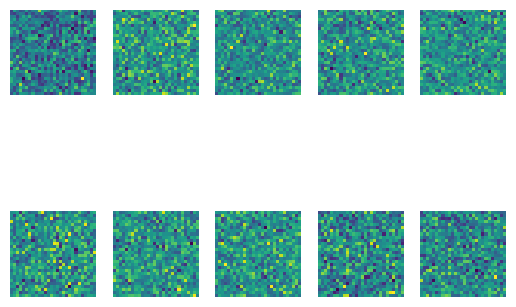

 10%|█         | 100/1000 [00:08<01:04, 13.86it/s]

epoch: 101; G_loss: 3.393503; D_loss: 0.182684


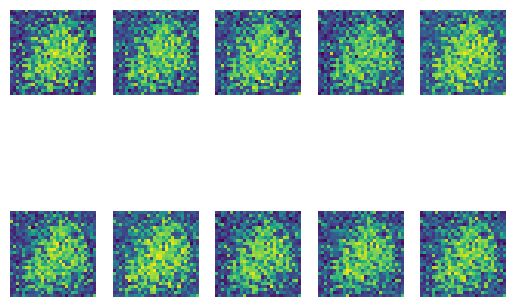

 20%|██        | 200/1000 [00:15<00:57, 13.99it/s]

epoch: 201; G_loss: 3.349582; D_loss: 0.219319


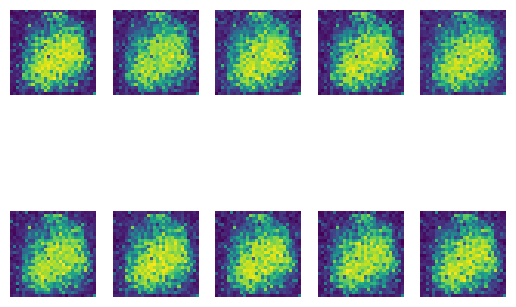

 30%|██▉       | 299/1000 [00:23<00:52, 13.27it/s]

epoch: 301; G_loss: 2.831956; D_loss: 0.342423


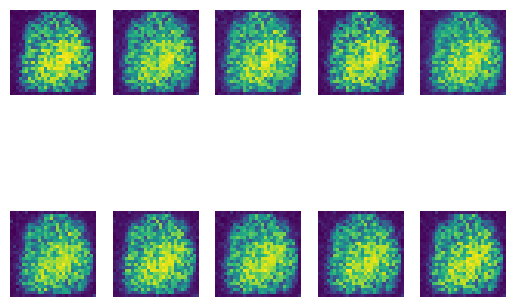

 40%|███▉      | 399/1000 [00:31<00:44, 13.47it/s]

epoch: 401; G_loss: 2.565183; D_loss: 0.215660


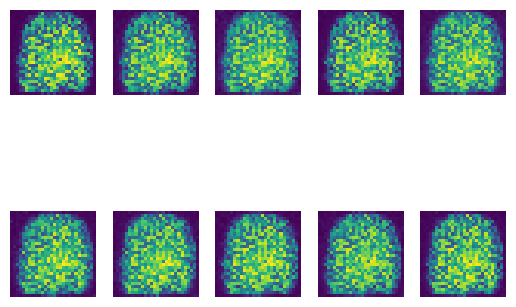

 50%|████▉     | 499/1000 [00:39<00:34, 14.34it/s]

epoch: 501; G_loss: 2.495722; D_loss: 0.206927


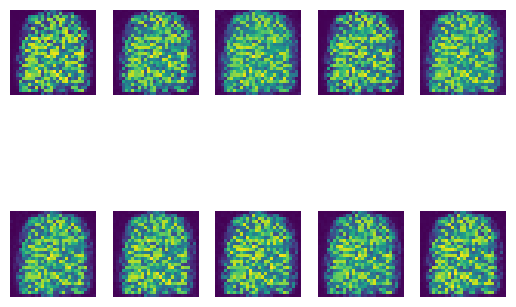

 60%|█████▉    | 599/1000 [00:48<00:32, 12.16it/s]

epoch: 601; G_loss: 2.465557; D_loss: 0.222016


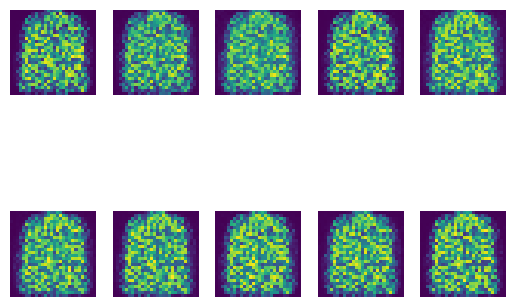

 70%|██████▉   | 699/1000 [00:55<00:21, 13.82it/s]

epoch: 701; G_loss: 2.460002; D_loss: 0.242510


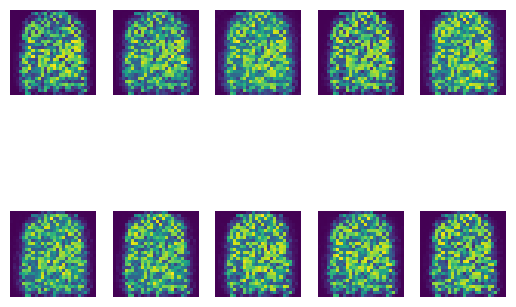

 80%|███████▉  | 799/1000 [01:03<00:14, 13.79it/s]

epoch: 801; G_loss: 2.388128; D_loss: 0.244590


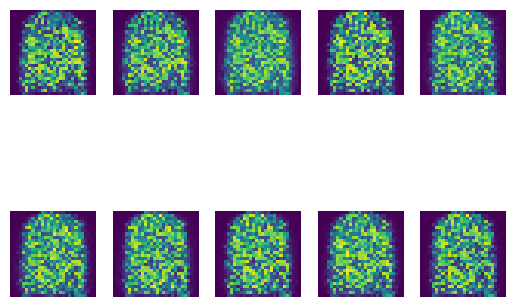

 90%|████████▉ | 899/1000 [01:11<00:07, 12.64it/s]

epoch: 901; G_loss: 2.234795; D_loss: 0.231457


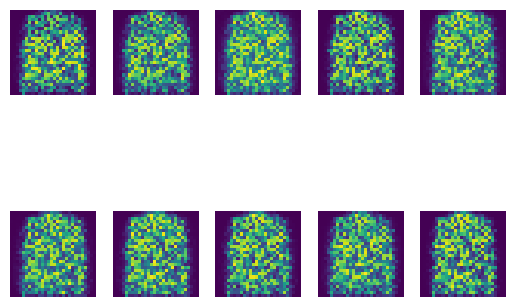

100%|██████████| 1000/1000 [01:19<00:00, 12.63it/s]


In [5]:
# Train
for epoch in trange(epochs):
  z_mb = tf.random.normal([batch_size, z_dim])
  x_real = next(x_iter)
  # Record operations
  with tf.GradientTape() as G_tape, tf.GradientTape() as D_tape:
    x_fake = G(z_mb)
    G_loss_curr = G_loss(D, x_fake)
    D_loss_curr = D_loss(D, x_real, x_fake)
  # Gradients
  G_grad = G_tape.gradient(G_loss_curr, G.trainable_variables)
  D_grad = D_tape.gradient(D_loss_curr, D.trainable_variables)
  # Apply gradients
  G_opt.apply_gradients(zip(G_grad, G.trainable_variables))
  D_opt.apply_gradients(zip(D_grad, D.trainable_variables))

  if epoch % 100 == 0:
    # Print results
    print('epoch: {}; G_loss: {:.6f}; D_loss: {:.6f}'.format(epoch+1, G_loss_curr, D_loss_curr))
    # Plot generated images
    for i in range(10):
      plt.subplot(2, 5, i+1)
      plt.imshow(G(z_vis)[i,:,:]*255.0)
      plt.axis('off')
    plt.show()